In [14]:
from IPython.display import Image

import numpy as np
import matplotlib.pyplot as plt

---


# Discretization of Dynamical systems

A **dynamical system** is a system whose **state** is uniquely specified by a set of variables and whose behavior is described by a predefined **rule** that describes the system's time evolution.

---


### Classification of dynamical systems

When studying dynamical systems it is useful to specify some characteristics that provide a subdivision into special categories. 

---


An important characteristic of a dynamical system is whether it is continuous or discrete.


#### Discrete-time

\begin{equation}
x_t = F(x_{t-1},t)
\end{equation}

This type of model is called a *difference* equation, a *recurrence* equation, or an *iterative* map.



---


#### Difference equations


A difference equation is an equation which evolves over discrete time intervals. Forexample,a difference equation would be a function which would tell us what the value of some variable $y$ is for any given time $n$.

We generally have some starting point $n$ ( usually $n=0$) and we may or may not have an end point.  For example, the following model exhibiting __geometric growth__, gives us the _rule_ how $y_n$ evolves over one period:

\begin{equation}
x_{n} = x_{n-1} + rx_{n-1}, \; x_0 = 1
\end{equation}

where $r$ is the growth rate.

---


#### Continuous-time

\begin{equation}
\frac{dx}{dt}=F(x,t)
\end{equation}

This is a *differential* equation (more specifically an *ordinary* differential equation or ODE).

#### Differential equations

Population growth can be modeled with:

\begin{equation}
\frac{dx}{dt}= rx, \quad x(t_0) = x_0
\end{equation}

where $r$ is the growth rate, which is the only _parameter_ in the model, and $x_0$ is the initial condition.

These kind of problems are called **initial value problems**. Most of the problems we will discuss are **IVP**s.

Analytical, or exact, solution of this **differential equation** is:

\begin{equation}
x(t)= x_0 e^{rt}
\end{equation}


---


For analysis, it is very important to know whether a dynamical system is _linear_ or not. 

#### A linear system 

is a dynamical equation whose rules involve just a linear combination of state variables (a constant times a variable, a constant, or their sum).

#### A non-linear system is anything else 

e.g., equation involving squares, cubes, radicals, trigonometric functions, etc., of state variables.


---
#### Analytical solution

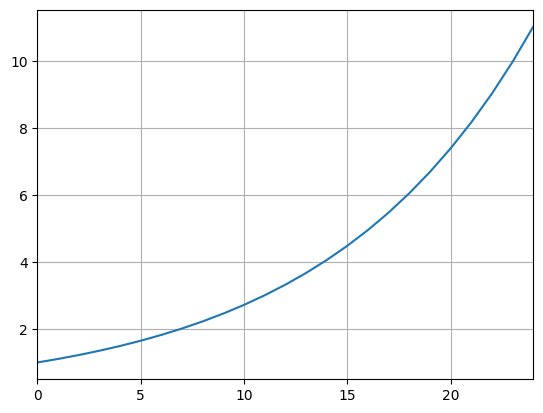

In [15]:
# Parameters
r = 0.1  # growth rate

# Initialization
x0 = 1
t_start = 0
t_final = 25
dt = 1 # time step  <<< this is important

t = np.arange(t_start, t_final, dt)
x_ana = np.zeros(t_final)  # correct

# compute ANALYTICAL solution
x_ana = x0*np.exp(r*t)

# visualize
fig, ax = plt.subplots()
ax.plot(t, x_ana)

_ = ax.set_xlim([0, t_final-1])
ax.grid()

---
#### Numerical solution

---
##### (a) Difference equation solution

Simulation length: 25


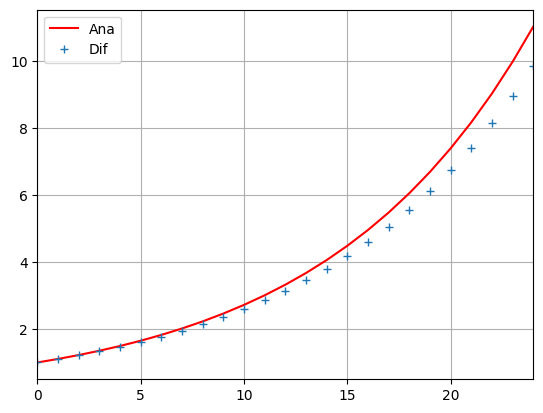

In [16]:
# Parameters (constants)
r = 0.1  # growth rate

# Initialization
x0 = 1
N = 25
print('Simulation length:',N)

t_dif = np.arange(N)
x_dif = np.zeros(N)

# evaluate difference equation
x_dif[0] = x0
for j in t_dif[1:]:
    x_dif[j] = x_dif[j-1] + x_dif[j-1]*r

# visualize
fig, ax = plt.subplots()
ax.plot(t, x_ana, 'r', t_dif, x_dif, '+')
ax.legend(['Ana', 'Dif'])

_ = ax.set_xlim([0, t_dif[-1]])
ax.grid()

In [17]:
# Difference between analytical solution and solution computed with difference equation
print('Data:')
for j in range(25):
    print(f"{j:5d}, {x_ana[j]:2f} , {x_dif[j]:2f}, {(abs(x_ana[j]-x_dif[j])/x_ana[j])*100:.2f}%")

Data:
    0, 1.000000 , 1.000000, 0.00%
    1, 1.105171 , 1.100000, 0.47%
    2, 1.221403 , 1.210000, 0.93%
    3, 1.349859 , 1.331000, 1.40%
    4, 1.491825 , 1.464100, 1.86%
    5, 1.648721 , 1.610510, 2.32%
    6, 1.822119 , 1.771561, 2.77%
    7, 2.013753 , 1.948717, 3.23%
    8, 2.225541 , 2.143589, 3.68%
    9, 2.459603 , 2.357948, 4.13%
   10, 2.718282 , 2.593742, 4.58%
   11, 3.004166 , 2.853117, 5.03%
   12, 3.320117 , 3.138428, 5.47%
   13, 3.669297 , 3.452271, 5.91%
   14, 4.055200 , 3.797498, 6.35%
   15, 4.481689 , 4.177248, 6.79%
   16, 4.953032 , 4.594973, 7.23%
   17, 5.473947 , 5.054470, 7.66%
   18, 6.049647 , 5.559917, 8.10%
   19, 6.685894 , 6.115909, 8.53%
   20, 7.389056 , 6.727500, 8.95%
   21, 8.166170 , 7.400250, 9.38%
   22, 9.025013 , 8.140275, 9.80%
   23, 9.974182 , 8.954302, 10.23%
   24, 11.023176 , 9.849733, 10.65%


---
##### (b) Numerical integration Solution

Given the following ODE:

\begin{equation}
\frac{dx}{dt}= rx \quad, x(t_0) = 1
\end{equation}

and recognizing that that the derivative $dx/dt$ is simply the rate of change of $x$ allows us to approximate the solution of the ODE as follows:

\begin{equation}
x_{n} = (1+r)x_{n-1} \Delta t, \\
x_0 = 1
\end{equation}

This approximation is called __Euler's method__.

Solvers like ODEINT use a very sophisticated numerical solver.

In [18]:
# Parameters (constants)
r = 0.1  # growth rate

# Initialization
x0 = 1

dt = 1 # integration time step
t_final = 25
N = int(t_final/dt)

print('Simulation length:',N)


Simulation length: 25


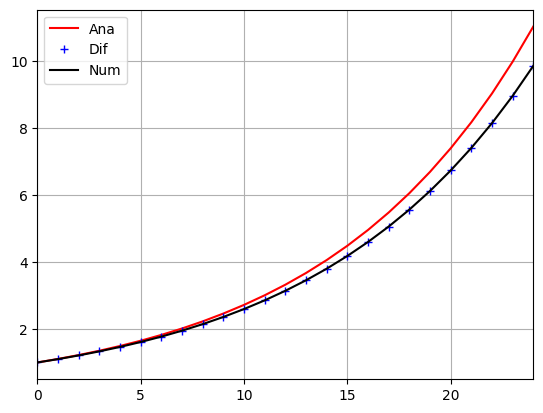

In [19]:
t_num = np.arange(0, t_final, dt)
x_num = np.zeros(N)

# compute numerical solution x_num
x_num[0] = x0
for j in t_num[1:]:
    x_num[j] = x_num[j-1] + x_num[j-1]*r*dt
    
# visualize
fig, ax = plt.subplots()
ax.plot(t, x_ana, 'r', t_dif, x_dif, 'b+', t_num, x_num, 'k')
ax.grid()
ax.legend(['Ana', 'Dif', 'Num'])
_ = ax.set_xlim([0, t[-1]])


__Why are the difference equation solutions and discretized solutions "identical"?__

In [20]:
# Difference between analytical solution and solution computed with difference equation
print('Data:')
for j in range(25):
    j_num = int(j/dt)
    print(f"{j:5d}, {x_ana[j]:.6f} , {x_num[j_num]:.6f}, {(abs(x_ana[j]-x_num[j_num])/x_ana[j])*100:.2f}%")

Data:
    0, 1.000000 , 1.000000, 0.00%
    1, 1.105171 , 1.100000, 0.47%
    2, 1.221403 , 1.210000, 0.93%
    3, 1.349859 , 1.331000, 1.40%
    4, 1.491825 , 1.464100, 1.86%
    5, 1.648721 , 1.610510, 2.32%
    6, 1.822119 , 1.771561, 2.77%
    7, 2.013753 , 1.948717, 3.23%
    8, 2.225541 , 2.143589, 3.68%
    9, 2.459603 , 2.357948, 4.13%
   10, 2.718282 , 2.593742, 4.58%
   11, 3.004166 , 2.853117, 5.03%
   12, 3.320117 , 3.138428, 5.47%
   13, 3.669297 , 3.452271, 5.91%
   14, 4.055200 , 3.797498, 6.35%
   15, 4.481689 , 4.177248, 6.79%
   16, 4.953032 , 4.594973, 7.23%
   17, 5.473947 , 5.054470, 7.66%
   18, 6.049647 , 5.559917, 8.10%
   19, 6.685894 , 6.115909, 8.53%
   20, 7.389056 , 6.727500, 8.95%
   21, 8.166170 , 7.400250, 9.38%
   22, 9.025013 , 8.140275, 9.80%
   23, 9.974182 , 8.954302, 10.23%
   24, 11.023176 , 9.849733, 10.65%


---
##### (c) Using a Solver

Given a simple model (ODE) it is possible we can get an analytical solution and then we are done.

It's not that easy in real life.

* Generally, we use ODE _solvers_.
    * _scipy.integrate_: ode(), odeint()
* Sometime we need to write the solver -> requires that we derive a discrete version of the ODE and then simulate it.

In [21]:
from scipy.integrate import odeint

In [22]:
# Parameters
r = 0.1 # or r = -0.1 (decay)

# Initialization
x0 = 1
t_start = 0
t_final = 25
dt = 1

t = np.arange(t_start, t_final, dt)



Using ODEINT (see below):

* The first parameter in odeint is the model-funcion.
* The second parameter is the initial values of the state variable x, that is x0.
* The third parameter is the time array t.
* The fourth parameter, args=(p,) is a list of necessary parameters in the model function.
    * Right now, there are none, but $r$ could be it.
* The two last parameters are error-tolerances in solving the differential equations (not used in CDS230)

In [23]:
# compute solution using SciPy ODEINT package
def exp_model(y, t):
    r = 0.1
    dxdt = r*y
    return dxdt

x_scipy = odeint(exp_model, x0, t)

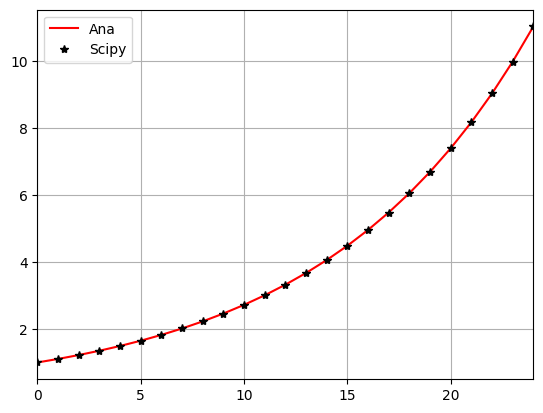

In [24]:
# visualize
fig, ax = plt.subplots()
ax.plot(t, x_ana, 'r', t, x_scipy, 'k*')
ax.grid()
ax.legend(['Ana', 'Scipy'])
_ = ax.set_xlim([0, t_final-1])

In [25]:
# Difference between analytical solution and solution computed with scipy
print('Data:')
for j in range(25):
    print(f"{j:5d}, {x_ana[j]:.2f} , {x_scipy[j][0]:.2f}, {(abs(x_ana[j]-x_scipy[j][0])/x_ana[j])*100:.2f}%")

Data:
    0, 1.00 , 1.00, 0.00%
    1, 1.11 , 1.11, 0.00%
    2, 1.22 , 1.22, 0.00%
    3, 1.35 , 1.35, 0.00%
    4, 1.49 , 1.49, 0.00%
    5, 1.65 , 1.65, 0.00%
    6, 1.82 , 1.82, 0.00%
    7, 2.01 , 2.01, 0.00%
    8, 2.23 , 2.23, 0.00%
    9, 2.46 , 2.46, 0.00%
   10, 2.72 , 2.72, 0.00%
   11, 3.00 , 3.00, 0.00%
   12, 3.32 , 3.32, 0.00%
   13, 3.67 , 3.67, 0.00%
   14, 4.06 , 4.06, 0.00%
   15, 4.48 , 4.48, 0.00%
   16, 4.95 , 4.95, 0.00%
   17, 5.47 , 5.47, 0.00%
   18, 6.05 , 6.05, 0.00%
   19, 6.69 , 6.69, 0.00%
   20, 7.39 , 7.39, 0.00%
   21, 8.17 , 8.17, 0.00%
   22, 9.03 , 9.03, 0.00%
   23, 9.97 , 9.97, 0.00%
   24, 11.02 , 11.02, 0.00%


__Why are the analyic solutions and SCIpy solutions "identical"?__